<a href="https://colab.research.google.com/github/mehrdadmoradii/neural-network/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys

<h1>Creating the dataset</h1>

In [2]:
np.random.seed(1)

In [3]:
feature_size = 2
num_samples = 200

In [4]:
dataset = np.vstack([
   np.random.multivariate_normal([0, 3.75], [[0.5, 0], [0, 0.5]], num_samples),
   np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]], num_samples), 
   np.random.multivariate_normal([3.5, 0], [[0.5, 0], [0, 0.5]], num_samples),
   np.random.multivariate_normal([3.5, 3.75], [[0.5, 0], [0, 0.5]], num_samples),
])

In [5]:
targets = np.vstack([
    np.zeros((num_samples, 1)),
    np.ones((num_samples, 1)),
    np.zeros((num_samples, 1)),
    np.ones((num_samples, 1)),
])

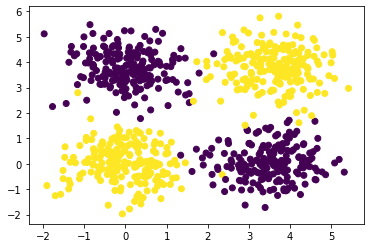

In [6]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=targets[:, 0])

In [7]:
targets_length = targets.shape[0]

targets_one_hot = np.zeros((targets_length, 2))

for i in range(len(targets_one_hot)):
  target = int(targets[i])
  targets_one_hot[i][target] = 1

<h1>Defining the utility functions</h1>

In [8]:
def relu(x):
  return (x > 0) * x

def relu_2_drev(x):
  return x > 0

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
import math, sys

def make_progress_bars(completed, total, scale=10):
  """Create and return a loading bar in a format of [####------]. 

  `#` sign indicates the comleted part and `-` the remaining part.
  """
  loaded_percentage = int((completed / total) * scale)
  completed_part = ('#' * loaded_percentage)
  remaining_part = ('-' * (10 - loaded_percentage))
  return '[{}]'.format(completed_part + remaining_part)

def make_progress_report(epoche, completed, total, error):
  progress_bars = make_progress_bars(completed, total)
  sys.stdout.write(
      '\r' + 'Epoches {} - [{}/{}] {} - Accuracy {}'.format(
          epoche, completed, total, progress_bars, str(error)
      )
  )

<h1>Training our model</h1>

In [10]:
def neural_network(epoches = 20, learning_rate = 0.05):

  history = {'epoches': list(), 'accuracy': list(),}

  weights_1 = 2*np.random.random((2, 10))-1
  weights_2 = 2*np.random.random((10, 5))-1
  weights_3 = 2*np.random.random((5, 2))-1

  for iteration in range(epoches):
    correct_count = 0

    for i in range(len(dataset)):
      goal = targets_one_hot[i:i+1]

      # ---------------- input layer ------------------

      # input layer
      layer_0 = dataset[i:i+1]  

      # hidden layers
      layer_1 = layer_0.dot(weights_1)  # affine transformation
      layer_1 = relu(layer_1) # applying non-linearity

      layer_2 = layer_1.dot(weights_2) # affine transformation
      layer_2 = relu(layer_2) # applying non-linearity

      # output layer
      layer_3 = tanh(layer_2.dot(weights_3)) 
      
      is_correct = (np.argmax(layer_3) == np.argmax(goal))
      is_correct = int(is_correct)

      correct_count += is_correct

      # --------------- Backpropagation ---------------
      layer_3_delta = (goal - layer_3)
      layer_2_delta = layer_3_delta.dot(weights_3.T) * relu_2_drev(layer_2)
      layer_1_delta = layer_2_delta.dot(weights_2.T) * relu_2_drev(layer_1)

      # adjusting learning weights
      weights_3 += learning_rate * np.dot(layer_2.T, layer_3_delta)
      weights_2 += learning_rate * np.dot(layer_1.T, layer_2_delta)
      weights_1 += learning_rate * np.dot(layer_0.T, layer_1_delta)

      make_progress_report(iteration, i+1, len(dataset), correct_count / len(dataset))

    correct_count /= len(dataset)
    
    print()
    history['epoches'].append(iteration)
    history['accuracy'].append(correct_count)
  
  return history

In [12]:
history = neural_network(epoches=100, learning_rate=0.01)

Epoches 0 - [800/800] [##########] - Accuracy 0.82125
Epoches 1 - [800/800] [##########] - Accuracy 0.85
Epoches 2 - [800/800] [##########] - Accuracy 0.9
Epoches 3 - [800/800] [##########] - Accuracy 0.90375
Epoches 4 - [800/800] [##########] - Accuracy 0.905
Epoches 5 - [800/800] [##########] - Accuracy 0.915
Epoches 6 - [800/800] [##########] - Accuracy 0.91625
Epoches 7 - [800/800] [##########] - Accuracy 0.9225
Epoches 8 - [800/800] [##########] - Accuracy 0.92125
Epoches 9 - [800/800] [##########] - Accuracy 0.91625
Epoches 10 - [800/800] [##########] - Accuracy 0.91875
Epoches 11 - [800/800] [##########] - Accuracy 0.9175
Epoches 12 - [800/800] [##########] - Accuracy 0.91875
Epoches 13 - [800/800] [##########] - Accuracy 0.9175
Epoches 14 - [800/800] [##########] - Accuracy 0.91625
Epoches 15 - [800/800] [##########] - Accuracy 0.9125
Epoches 16 - [800/800] [##########] - Accuracy 0.915
Epoches 17 - [800/800] [##########] - Accuracy 0.915
Epoches 18 - [800/800] [##########] - A

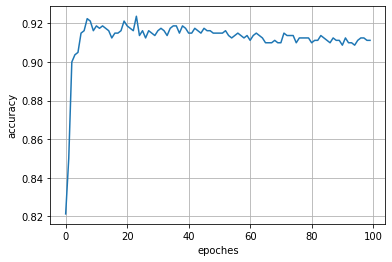

In [13]:
plt.plot(history['epoches'], history['accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.grid(True)

In [13]:
history = neural_network(epoches=150, learning_rate=0.05)

Epoches 0 - [800/800] [##########] - Accuracy 0.90125
Epoches 1 - [800/800] [##########] - Accuracy 0.93
Epoches 2 - [800/800] [##########] - Accuracy 0.92375
Epoches 3 - [800/800] [##########] - Accuracy 0.91875
Epoches 4 - [800/800] [##########] - Accuracy 0.92125
Epoches 5 - [800/800] [##########] - Accuracy 0.925
Epoches 6 - [800/800] [##########] - Accuracy 0.915
Epoches 7 - [800/800] [##########] - Accuracy 0.925
Epoches 8 - [800/800] [##########] - Accuracy 0.925
Epoches 9 - [800/800] [##########] - Accuracy 0.93125
Epoches 10 - [800/800] [##########] - Accuracy 0.9375
Epoches 11 - [800/800] [##########] - Accuracy 0.93875
Epoches 12 - [800/800] [##########] - Accuracy 0.93875
Epoches 13 - [800/800] [##########] - Accuracy 0.93875
Epoches 14 - [800/800] [##########] - Accuracy 0.9325
Epoches 15 - [800/800] [##########] - Accuracy 0.93625
Epoches 16 - [800/800] [##########] - Accuracy 0.93375
Epoches 17 - [800/800] [##########] - Accuracy 0.93625
Epoches 18 - [800/800] [#########

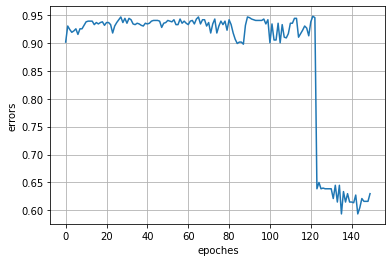

In [14]:
plt.plot(history['epoches'], history['accuracy'])
plt.xlabel('epoches')
plt.ylabel('errors')
plt.grid(True)

<h1>Tweaking the model to measure validation error as well</h1>
<p>In the previous section, we succeeded achieving 94% accuracy. However, we measured the accuracy based on the training data. In other words, we cannot get noticed if the model is overfitting. Therefore, we are going to tweak our model to measure the accuracy of the unseen data as well!</p>

In [14]:
def split_data(a, b, test_size=0.2):
  """Try to mimic the scikit-learn's train_test_split.
  
  Returns the splitted data in a format of (x_train, y_train), (x_test, y_test).
  """
  assert len(a) == len(b)

  test_count = int(len(a) * test_size)
  test_indices = np.random.choice(len(a), test_count, replace=False)
  train_indices = [i for i in range(len(a)) if i not in test_indices]

  x_train, y_train = a[train_indices], b[train_indices]
  x_test, y_test = a[test_indices], b[test_indices]
  return (x_train, y_train), (x_test, y_test)

In [15]:
def neural_network(epoches = 20, learning_rate = 0.05, validation_size=0.2):

  history = {'epoches': list(), 
             'accuracy_train': list(), 
             'accuracy_valid': list(),}

  weights_1 = 2*np.random.random((2, 5))-1
  weights_2 = 2*np.random.random((5, 5))-1
  weights_3 = 2*np.random.random((5, 5))-1
  weights_4 = 2*np.random.random((5, 2))-1

  # separating the training and validation dataset
  (x_train, y_train), (x_valid, y_valid) = split_data(
      dataset, targets_one_hot, test_size=validation_size)  

  for iteration in range(epoches):

    correct_count_train = 0
    correct_count_valid = 0

    for i in range(len(x_train)):
      goal = y_train[i:i+1]

      # ---------------- input layer ------------------

      # input layer
      layer_0 = x_train[i:i+1]  

      # hidden layers
      layer_1 = layer_0.dot(weights_1)  # affine transformation
      layer_1 = relu(layer_1) # applying non-linearity

      layer_2 = layer_1.dot(weights_2) # affine transformation
      layer_2 = relu(layer_2) # applying non-linearity

      layer_3 = layer_2.dot(weights_3) # affine transformation
      layer_3 = relu(layer_3) # applying non-linearity

      # output layer
      layer_4 = tanh(layer_3.dot(weights_4))

      is_correct = (np.argmax(layer_4) == np.argmax(goal))
      is_correct = int(is_correct)

      correct_count_train += is_correct

      # --------------- Backpropagation ---------------
      layer_4_delta = (goal - layer_4)
      layer_3_delta = layer_4_delta.dot(weights_4.T) * relu_2_drev(layer_3)
      layer_2_delta = layer_3_delta.dot(weights_3.T) * relu_2_drev(layer_2)
      layer_1_delta = layer_2_delta.dot(weights_2.T) * relu_2_drev(layer_1)

      # adjusting learning weights
      weights_4 += learning_rate * np.dot(layer_3.T, layer_4_delta)
      weights_3 += learning_rate * np.dot(layer_2.T, layer_3_delta)
      weights_2 += learning_rate * np.dot(layer_1.T, layer_2_delta)
      weights_1 += learning_rate * np.dot(layer_0.T, layer_1_delta)


      make_progress_report(iteration, i+1, len(x_train), correct_count_train/(i+1))
    
    print()

    for i in range(len(x_valid)):
      goal = y_valid[i:i+1]

      # ---------------- input layer ------------------

      # input layer
      layer_0 = x_valid[i:i+1]  

      # hidden layers
      layer_1 = layer_0.dot(weights_1)  # affine transformation
      layer_1 = relu(layer_1) # applying non-linearity

      layer_2 = layer_1.dot(weights_2) # affine transformation
      layer_2 = relu(layer_2) # applying non-linearity

      layer_3 = layer_2.dot(weights_3) # affine transformation
      layer_3 = relu(layer_3) # applying non-linearity

      # output layer
      layer_4 = tanh(layer_3.dot(weights_4))

      is_correct = (np.argmax(layer_4) == np.argmax(goal))
      is_correct = int(is_correct)

      correct_count_valid += is_correct

    correct_count_train /= len(y_train)
    correct_count_valid /= len(y_valid)

    history['epoches'].append(iteration)
    history['accuracy_train'].append(correct_count_train)
    history['accuracy_valid'].append(correct_count_valid)
  
  return history

In [61]:
history = neural_network(epoches=300, learning_rate=0.02)

Epoches 0 - [640/640] [##########] - Accuracy 0.7921875
Epoches 1 - [640/640] [##########] - Accuracy 0.8015625
Epoches 2 - [640/640] [##########] - Accuracy 0.8234375
Epoches 3 - [640/640] [##########] - Accuracy 0.846875
Epoches 4 - [640/640] [##########] - Accuracy 0.903125
Epoches 5 - [640/640] [##########] - Accuracy 0.909375
Epoches 6 - [640/640] [##########] - Accuracy 0.9171875
Epoches 7 - [640/640] [##########] - Accuracy 0.925
Epoches 8 - [640/640] [##########] - Accuracy 0.9296875
Epoches 9 - [640/640] [##########] - Accuracy 0.9328125
Epoches 10 - [640/640] [##########] - Accuracy 0.934375
Epoches 11 - [640/640] [##########] - Accuracy 0.921875
Epoches 12 - [640/640] [##########] - Accuracy 0.8953125
Epoches 13 - [640/640] [##########] - Accuracy 0.871875
Epoches 14 - [640/640] [##########] - Accuracy 0.8140625
Epoches 15 - [640/640] [##########] - Accuracy 0.790625
Epoches 16 - [640/640] [##########] - Accuracy 0.7875
Epoches 17 - [640/640] [##########] - Accuracy 0.778125

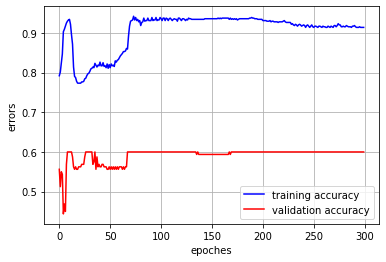

In [62]:
plt.plot(history['epoches'], history['accuracy_train'], c='b', label='training accuracy')
plt.plot(history['epoches'], history['accuracy_valid'], c='r', label='validation accuracy')
plt.xlabel('epoches')
plt.ylabel('errors')
plt.legend()
plt.grid(True)

<h1>Introducing Dropout regularization and early-stopping to our model</h1>

In [18]:
def neural_network(epoches = 20, learning_rate = 0.05, validation_size=0.2, early_stopping=False):

  history = {'epoches': list(), 
             'accuracy_train': list(), 
             'accuracy_valid': list(),}

  weights_1 = 2*np.random.random((2, 5))-1
  weights_2 = 2*np.random.random((5, 5))-1
  weights_3 = 2*np.random.random((5, 5))-1
  weights_4 = 2*np.random.random((5, 2))-1

  # separating the training and validation dataset
  (x_train, y_train), (x_valid, y_valid) = split_data(
      dataset, targets_one_hot, test_size=validation_size)  

  for iteration in range(epoches):

    correct_count_train = 0
    correct_count_valid = 0

    for i in range(len(x_train)):
      goal = y_train[i:i+1]

      # ---------------- input layer ------------------

      # input layer
      layer_0 = x_train[i:i+1]  

      # hidden layers
      layer_1 = layer_0.dot(weights_1)  # affine transformation
      layer_1 = relu(layer_1) # applying non-linearity      

      layer_2 = layer_1.dot(weights_2) # affine transformation
      layer_2 = relu(layer_2) # applying non-linearity

      dropout_mask = np.random.randint(2,size=layer_1.shape)
      layer_2 *= dropout_mask * 2

      layer_3 = layer_2.dot(weights_3) # affine transformation
      layer_3 = relu(layer_3) # applying non-linearity

      # output layer
      layer_4 = tanh(layer_3.dot(weights_4))

      is_correct = (np.argmax(layer_4) == np.argmax(goal))
      is_correct = int(is_correct)

      correct_count_train += is_correct

      # --------------- Backpropagation ---------------
      layer_4_delta = (goal - layer_4)
      layer_3_delta = layer_4_delta.dot(weights_4.T) * relu_2_drev(layer_3)
      layer_2_delta = layer_3_delta.dot(weights_3.T) * relu_2_drev(layer_2)
      layer_1_delta = layer_2_delta.dot(weights_2.T) * relu_2_drev(layer_1)
      layer_2_delta *= dropout_mask

      # adjusting learning weights
      weights_4 += learning_rate * np.dot(layer_3.T, layer_4_delta)
      weights_3 += learning_rate * np.dot(layer_2.T, layer_3_delta)
      weights_2 += learning_rate * np.dot(layer_1.T, layer_2_delta)
      weights_1 += learning_rate * np.dot(layer_0.T, layer_1_delta)


      make_progress_report(iteration, i+1, len(x_train), correct_count_train/(i+1))
    
    print()

    for i in range(len(x_valid)):
      goal = y_valid[i:i+1]

      # ---------------- input layer ------------------

      # input layer
      layer_0 = x_valid[i:i+1]  

      # hidden layers
      layer_1 = layer_0.dot(weights_1)  # affine transformation
      layer_1 = relu(layer_1) # applying non-linearity

      layer_2 = layer_1.dot(weights_2) # affine transformation
      layer_2 = relu(layer_2) # applying non-linearity

      layer_3 = layer_2.dot(weights_3) # affine transformation
      layer_3 = relu(layer_3) # applying non-linearity

      # output layer
      layer_4 = tanh(layer_3.dot(weights_4))

      is_correct = (np.argmax(layer_4) == np.argmax(goal))
      is_correct = int(is_correct)

      correct_count_valid += is_correct

    correct_count_train /= len(y_train)
    correct_count_valid /= len(y_valid)

    history['epoches'].append(iteration)
    history['accuracy_train'].append(correct_count_train)
    history['accuracy_valid'].append(correct_count_valid)

    if correct_count_valid >= early_stopping:
      return history
  
  return history

In [31]:
history = neural_network(1000, 0.02, early_stopping=0.89)

Epoches 0 - [640/640] [##########] - Accuracy 0.61875
Epoches 1 - [640/640] [##########] - Accuracy 0.5984375
Epoches 2 - [640/640] [##########] - Accuracy 0.65
Epoches 3 - [640/640] [##########] - Accuracy 0.678125
Epoches 4 - [640/640] [##########] - Accuracy 0.7140625
Epoches 5 - [640/640] [##########] - Accuracy 0.75
Epoches 6 - [640/640] [##########] - Accuracy 0.7546875
Epoches 7 - [640/640] [##########] - Accuracy 0.7921875
Epoches 8 - [640/640] [##########] - Accuracy 0.7640625
Epoches 9 - [640/640] [##########] - Accuracy 0.7734375
Epoches 10 - [640/640] [##########] - Accuracy 0.775
Epoches 11 - [640/640] [##########] - Accuracy 0.809375
Epoches 12 - [640/640] [##########] - Accuracy 0.815625
Epoches 13 - [640/640] [##########] - Accuracy 0.8296875
Epoches 14 - [640/640] [##########] - Accuracy 0.8
Epoches 15 - [640/640] [##########] - Accuracy 0.8484375
Epoches 16 - [640/640] [##########] - Accuracy 0.828125
Epoches 17 - [640/640] [##########] - Accuracy 0.8421875
Epoches 18

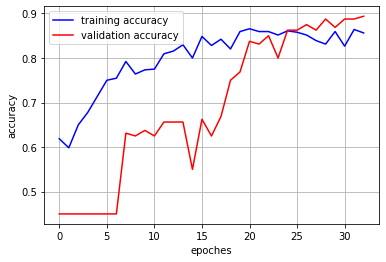

In [32]:
plt.plot(history['epoches'], history['accuracy_train'], c='b', label='training accuracy')
plt.plot(history['epoches'], history['accuracy_valid'], c='r', label='validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)